# v4
Nesta versão, o objetivo é acrescentar a restrição de não haver intervalos entre aulas de um mesmo professor, de uma mesma disciplina, para uma mesma turma no mesmo dia.

# Índice

1. Carregamento e exploração dos dados
2. Definição de variáveis
3. Criação e otimização do modelo
4. Visualização dos resultados

## 1. Carregamento e exploração dos dados

In [22]:

# Importa as bibliotecas e métodos definidos no arquivo utils/funcoes.py
from utils.funcoes import *


In [2]:
# Carrega as tabelas necessárias
grade_compilada = pd.read_csv('dados/grade_compilada.csv', sep=';')
grade_compilada_tratado = pd.read_csv('dados/grade_compilada_tratado.csv', sep=',')
hora_aula_materia = pd.read_csv('dados/hora_aula_materia.csv', sep=',')
materias_comuns = pd.read_csv('dados/materias_comuns.csv', sep=',')
professores_materias = pd.read_csv('dados/professores_materias.csv', sep=',')

In [3]:
hora_aula_materia.tail()

,Professor,Materia,Semestre_Curso,Curso,Total_Horas,Periodos_Total
188,VALDIR,PRATICAPEDAGOGICADOENSINOCEM335,5_LCEMATEMATICA,LCEMATEMATICA,2,1.0
189,VALDIR,PRATICAPEDAGOGICADOENSINOCEM335,5_LCEQUIMICA,LCEQUIMICA,2,1.0
190,VALDIR,PRATICAPEDAGOGICAMATEMATICAIICEM339,7_LCEMATEMATICA,LCEMATEMATICA,4,2.0
191,VIRNEI,FISICAGERAL,3_EAQ,EAQ,4,2.0
192,VIRNEI,FISICAII,3_EAS,EAS,3,2.0


In [4]:
professores_materias[professores_materias['Curso'].isin(['LCE'])].count()

Professor     14
Campus        14
Curso         14
Tipo_Curso    14
Materia       14
dtype: int64

In [5]:
# Altera o index da variável hora_aula_materia
df_hor = hora_aula_materia.set_index(['Professor','Semestre_Curso','Materia'])
df_hor

Curso  \
Professor Semestre_Curso  Materia                                              
ALEX      1_EAS           CALCULODIFERENCIALEINTEGRALI                   EAS   
          1_ECV           CALCULOI                                       ECV   
          5_LCEMATEMATICA GEOMETRIAECONSTRUCOESCEM319          LCEMATEMATICA   
ARMANI    1_EAS           INTRODUCAOAENGENHARIAAMBIENTAL                 EAS   
          7_EAS           POLUICAODOAR                                   EAS   
...                                                                      ...   
VALDIR    5_LCEMATEMATICA PRATICAPEDAGOGICADOENSINOCEM335      LCEMATEMATICA   
          5_LCEQUIMICA    PRATICAPEDAGOGICADOENSINOCEM335         LCEQUIMICA   
          7_LCEMATEMATICA PRATICAPEDAGOGICAMATEMATICAIICEM339  LCEMATEMATICA   
VIRNEI    3_EAQ           FISICAGERAL                                    EAQ   
          3_EAS           FISICAII                                       EAS   

                                                               Total_Horas  \
Professor Semestre_Curso  Materia                                            
ALEX      1_EAS           CALCULODIFERENCIALEINTEGRALI                   4   
          1_ECV           CALCULOI                                       4   
          5_LCEMATEMATICA GEOMETRIAECONSTRUCOESCEM319                    4   
ARMANI    1_EAS           INTRODUCAOAENGENHARIAAMBIENTAL                 4   
          7_EAS           POLUICAODOAR                                   3   
...                                                                    ...   
VALDIR    5_LCEMATEMATICA PRATICAPEDAGOGICADOENSINOCEM335                2   
          5_LCEQUIMICA    PRATICAPEDAGOGICADOENSINOCEM335                2   
          7_LCEMATEMATICA PRATICAPEDAGOGICAMATEMATICAIICEM339            4   
VIRNEI    3_EAQ           FISICAGERAL                                    4   
          3_EAS           FISICAII                                       3   

                                                               Periodos_Total  
Professor Semestre_Curso  Materia                                              
ALEX      1_EAS           CALCULODIFERENCIALEINTEGRALI                    2.0  
          1_ECV           CALCULOI                                        2.0  
          5_LCEMATEMATICA GEOMETRIAECONSTRUCOESCEM319                     2.0  
ARMANI    1_EAS           INTRODUCAOAENGENHARIAAMBIENTAL                  2.0  
          7_EAS           POLUICAODOAR                                    2.0  
...                                                                       ...  
VALDIR    5_LCEMATEMATICA PRATICAPEDAGOGICADOENSINOCEM335                 1.0  
          5_LCEQUIMICA    PRATICAPEDAGOGICADOENSINOCEM335                 1.0  
          7_LCEMATEMATICA PRATICAPEDAGOGICAMATEMATICAIICEM339             2.0  
VIRNEI    3_EAQ           FISICAGERAL                                     2.0  
          3_EAS           FISICAII                                        2.0  

[193 rows x 3 columns]

In [6]:
hora_aula_materia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Professor       193 non-null    object 
 1   Materia         193 non-null    object 
 2   Semestre_Curso  193 non-null    object 
 3   Curso           193 non-null    object 
 4   Total_Horas     193 non-null    int64  
 5   Periodos_Total  193 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 9.2+ KB


In [23]:
get_hora_aula_materia('ALEX','CALCULODIFERENCIALEINTEGRALI', '1_EAS', hora_aula_materia)

4.0

In [8]:
df_turno = grade_compilada_tratado[['Tipo_Curso','Semestre_Curso']].set_index(['Semestre_Curso'])
get_turno("1_EAQ", df_turno)

'MATUTINO'

In [9]:
grade_compilada_tratado.columns

Index(['Campus', 'Curso', 'Periodo_dia', 'Horario', 'Semestre', 'Dia',
       'Periodo_Aula', 'Tipo_Curso', 'Materia', 'Professor', 'Observacao',
       'Semestre_Curso'],
      dtype='object')

In [10]:
grade_compilada_tratado[grade_compilada_tratado['Campus']=='MIRASOL'][['Semestre_Curso','Materia','Campus']].set_index(['Semestre_Curso','Materia'])

Campus
Semestre_Curso Materia                        
1_EAQ          INTRODUCAOAAQUICULTURA  MIRASOL
               INTRODUCAOAAQUICULTURA  MIRASOL
               PROBABILIDADE           MIRASOL
               PROBABILIDADE           MIRASOL
               INTRODUCAOAQUALIDADE    MIRASOL
...                                        ...
7_LCEQUIMICA   FISICOQUIMICACEM365     MIRASOL
               FISICOQUIMICACEM365     MIRASOL
               FISICOQUIMICACEM365     MIRASOL
3_OCEANO       FISICAEXPERIMENTALII    MIRASOL
               FISICAEXPERIMENTALII    MIRASOL

[317 rows x 1 columns]

## 2. Definição de variáveis

In [11]:
df_mirassol = grade_compilada_tratado[grade_compilada_tratado['Campus']=='MIRASOL'][['Semestre_Curso','Materia','Campus']].set_index(['Semestre_Curso','Materia'])
get_campus('1_EAQ', 'INTRODUCAOAAQUICULTURA', df_mirassol)

True

In [ ]:
# Grade compilada completa
grade_compilada_tratado

,Campus,Curso,Periodo_dia,Horario,Semestre,Dia,Periodo_Aula,Tipo_Curso,Materia,Professor,Observacao,Semestre_Curso
0,MIRASOL,EAQ,MANHA,1,1,SEGUNDA,MATUTINO,MATUTINO,INTRODUCAOAAQUICULTURA,LAGREZE,NaN,1_EAQ
1,MIRASOL,EAQ,MANHA,2,1,SEGUNDA,MATUTINO,MATUTINO,INTRODUCAOAAQUICULTURA,LAGREZE,NaN,1_EAQ
2,MIRASOL,EAQ,MANHA,3,1,SEGUNDA,MATUTINO,MATUTINO,PROBABILIDADE,CENDON,NaN,1_EAQ
3,MIRASOL,EAQ,MANHA,4,1,SEGUNDA,MATUTINO,MATUTINO,PROBABILIDADE,CENDON,NaN,1_EAQ
4,MIRASOL,EAQ,MANHA,1,1,TERCA,MATUTINO,MATUTINO,INTRODUCAOAQUALIDADE,SACHSIDA,NaN,1_EAQ
...,...,...,...,...,...,...,...,...,...,...,...,...
549,PONTAL,OCEANO,TARDE,4,9,TERCA,VESPERTINO,INTEGRAL,GASESDISOLVIDOSEACIDIFICACAO,TATIANE,NaN,9_OCEANO
550,PONTAL,OCEANO,TARDE,1,9,QUARTA,VESPERTINO,INTEGRAL,INTRODUCAOAMODELAGEMDEPROCESSOS,DOURADO,NaN,9_OCEANO
551,PONTAL,OCEANO,TARDE,2,9,QUARTA,VESPERTINO,INTEGRAL,INTRODUCAOAMODELAGEMDEPROCESSOS,DOURADO,NaN,9_OCEANO
552,PONTAL,OCEANO,TARDE,1,9,QUINTA,VESPERTINO,INTEGRAL,INTRODUCAOAMODELAGEMDEPROCESSOS,DOURADO,NaN,9_OCEANO


In [13]:
# Grade compilada reduzida, somente com o professor Lagreze
grade_compilada_tratado_menor = grade_compilada_tratado[grade_compilada_tratado['Professor'] == 'LAGREZE']
grade_compilada_tratado_menor

,Campus,Curso,Periodo_dia,Horario,Semestre,Dia,Periodo_Aula,Tipo_Curso,Materia,Professor,Observacao,Semestre_Curso
0,MIRASOL,EAQ,MANHA,1,1,SEGUNDA,MATUTINO,MATUTINO,INTRODUCAOAAQUICULTURA,LAGREZE,NaN,1_EAQ
1,MIRASOL,EAQ,MANHA,2,1,SEGUNDA,MATUTINO,MATUTINO,INTRODUCAOAAQUICULTURA,LAGREZE,NaN,1_EAQ
63,MIRASOL,EAQ,MANHA,2,7,QUARTA,MATUTINO,MATUTINO,MALACOCULTURA,LAGREZE,NaN,7_EAQ
64,MIRASOL,EAQ,MANHA,3,7,QUARTA,MATUTINO,MATUTINO,MALACOCULTURA,LAGREZE,NaN,7_EAQ
74,MIRASOL,EAQ,MANHA,3,9,SEGUNDA,MATUTINO,MATUTINO,ELABORACAODEPROJETOS,LAGREZE,NaN,9_EAQ
75,MIRASOL,EAQ,MANHA,4,9,SEGUNDA,MATUTINO,MATUTINO,ELABORACAODEPROJETOS,LAGREZE,NaN,9_EAQ
84,MIRASOL,EAQ,MANHA,1,9,QUINTA,MATUTINO,MATUTINO,HIDRAULICAAQUICULTURA,LAGREZE,NaN,9_EAQ
85,MIRASOL,EAQ,MANHA,2,9,QUINTA,MATUTINO,MATUTINO,HIDRAULICAAQUICULTURA,LAGREZE,NaN,9_EAQ
86,MIRASOL,EAQ,MANHA,3,9,QUINTA,MATUTINO,MATUTINO,HIDRAULICAAQUICULTURA,LAGREZE,NaN,9_EAQ
87,MIRASOL,EAQ,MANHA,4,9,QUINTA,MATUTINO,MATUTINO,HIDRAULICAAQUICULTURA,LAGREZE,NaN,9_EAQ


In [ ]:
# Define os conjuntos
professores = constroi_lista(df = grade_compilada_tratado, coluna = 'Professor') 
turmas = constroi_lista(df = grade_compilada_tratado, coluna = 'Semestre_Curso')
campus = constroi_lista(df = grade_compilada_tratado, coluna = 'Campus')
dias_semana = constroi_lista(df = grade_compilada_tratado, coluna = 'Dia')
horarios = range(1, 14) 
disciplinas = constroi_lista(df = grade_compilada_tratado, coluna = 'Materia') 
professores_comuns = materias_comuns['Professor'].unique().tolist()
turmas_comuns = materias_comuns['Semestre_Curso'].unique().tolist()
disciplinas_comuns = materias_comuns['Materia'].unique().tolist()


In [15]:
# Define os turnos
turno_horarios = {
    'MATUTINO': [1,2,3,4],  # Horários no turno matutino
    'VESPERTINO':[5,6,7,8,9],
    'NOTURNO': [10,11,12,13],  # Horários no turno noturno
    'INTEGRAL': [1,2,3,4,5,6,7,8,9]  # Horários permitidos para cursos integrais
}


# Atualiza o mapeamento de turmas para seus turnos usando a função `get_turno`
mapa_turma_turno = {}
for turma in turmas:
    turno = get_turno(turma, df_turno)  # Determina o turno da turma
    if turno in turno_horarios:
        mapa_turma_turno[turma] = turno_horarios[turno]
    else:
        raise ValueError(f"Turno desconhecido para a turma: {turma}")

In [17]:
# Mapa que associa cada turma com seus horários possíveis
mapa_turma_turno

{'1_EAQ': [1, 2, 3, 4],
 '3_EAQ': [1, 2, 3, 4],
 '5_EAQ': [1, 2, 3, 4],
 '7_EAQ': [1, 2, 3, 4],
 '9_EAQ': [1, 2, 3, 4],
 '1_EAS': [5, 6, 7, 8, 9],
 '3_EAS': [5, 6, 7, 8, 9],
 '5_EAS': [5, 6, 7, 8, 9],
 '9_EAS': [5, 6, 7, 8, 9],
 '7_EAS': [5, 6, 7, 8, 9],
 '1_ECV': [5, 6, 7, 8, 9],
 '3_ECV': [5, 6, 7, 8, 9],
 '5_ECV': [5, 6, 7, 8, 9],
 '7_ECV': [5, 6, 7, 8, 9],
 '9_ECV': [5, 6, 7, 8, 9],
 '1_LCE': [10, 11, 12, 13],
 '3_LCE': [10, 11, 12, 13],
 '5_LCEFISICA': [10, 11, 12, 13],
 '5_LCEMATEMATICA': [10, 11, 12, 13],
 '5_LCEQUIMICA': [10, 11, 12, 13],
 '7_LCEFISICA': [10, 11, 12, 13],
 '7_LCEMATEMATICA': [10, 11, 12, 13],
 '7_LCEQUIMICA': [10, 11, 12, 13],
 '1_OCEANO': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 '3_OCEANO': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 '5_OCEANO': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 '7_OCEANO': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 '9_OCEANO': [1, 2, 3, 4, 5, 6, 7, 8, 9]}

## 3. Criação e otimização do modelo

In [17]:
# Inicialização do modelo
model = gp.Model("Alocação_Professores")

# Cria as variáveis de decisão
x = model.addVars(professores, disciplinas, turmas, dias_semana, horarios, vtype=GRB.BINARY, name="x")

# Essa variável serve como indicador binário para saber se a disciplina mm está sendo ministrada pelo professor pp no dia dd e horário hh.
y = model.addVars(professores,disciplinas,dias_semana,horarios,vtype=GRB.BINARY, name="y")

# Essas são as variáveis cuja soma será minimizada: a quantidade de idas dos professores à universidade
idas = model.addVars(professores, dias_semana, vtype=gp.GRB.INTEGER, name="idas")

Set parameter Username
Set parameter LicenseID to value 2603702
Academic license - for non-commercial use only - expires 2025-12-26


In [18]:
# Define a função objetivo
model.setObjective(
    gp.quicksum(idas[p,d]
                for p in professores
                for d in dias_semana)
    ,GRB.MINIMIZE)
                    

# Restrição 2 - Cada professor tem no máximo uma aula em um horário específico
for p in professores:
    for d in dias_semana:
        for h in horarios:
            model.addConstr(gp.quicksum(x[p,m,t,d,h]                                         
                                        for m in disciplinas 
                                        for t in turmas 
                                        if m not in disciplinas_comuns) <= 1, name=f'R2_{p}_{d}_{h}') # if para não dar conflito com 6

# Restrição 3 - Cada turma tem no máximo um professor em um horário específico
for t in turmas:
    for d in dias_semana:
        for h in horarios:
            model.addConstr(gp.quicksum(x[p,m,t,d,h] 
                                        for p in professores 
                                        for m in disciplinas 
                                        if m not in disciplinas_comuns) <= 1, name=f'R3_{t}_{d}_{h}') # + 999*r3[t,d,h] - precisei adicionar o if para não dar conflito com 6

# Restrição 5 
# Associa cada disciplina ao professora que irá lecionar cada uma delas e quantos periodos deve aparecer
for p in professores:
    for t in turmas:
        for m in disciplinas:
            model.addConstr(gp.quicksum(x[p,m,t,d,h] for d in dias_semana for h in horarios) == get_hora_aula_materia(p,m,t,hora_aula_materia), name=f'R5_{p}_{m}_{t}') # R_p,t

# Restrição 6
# Garante que se uma disciplina comum está alocada, ocorre simultaneamente para todas as turmas
for p in professores_comuns:
    for m in disciplinas_comuns:
        for d in dias_semana:
            for h in horarios:
                model.addConstr(
                    gp.quicksum(x[p,m,t,d,h] for t in turmas_comuns) ==
                    len(turmas_comuns) * y[p, m, d, h],
                    name=f'R6_{p}_{m}_{d}_{h}'
                )

# Restrição 7
# Garante que as aulas sejam alocadas nas 6 salas de aulas disponíveis do campus mirassol
# Isto é, a quantidade de aulas a cada horário deve ser no máximo 6, pois esse é o limite de salas
for h in horarios:
    for d in dias_semana:
        model.addConstr(
            gp.quicksum(
                x[p,m,t,d,h]
                for p in professores
                for m in disciplinas
                for t in turmas
                if get_campus(t, m, df_mirassol)  # Verifica se a turma e a disciplina estão em Mirassol
            ) <= 6,
            name=f'R7_{d}_{h}'
        )
        
# Restrição 8
# Serve para garantir que disciplinas sejam alocadas apenas nos horários permitidos do turno da turma 
for t in turmas:
    horarios_permitidos = mapa_turma_turno[t]  # Horários válidos com base no turno
    for m in disciplinas:
        for d in dias_semana:
            model.addConstr(
                gp.quicksum(x[p,m,t,d,h] for p in professores for h in horarios if h not in horarios_permitidos) <= 0,
                name=f'R8_{t}_{m}_{d}'
            )

# Restrição 9
# Serve para garantir que a variável idas é sempre maior ou igual que a variável x
for p in professores:
    for d in dias_semana:       
        for m in disciplinas:
            for t in turmas:
                for h in horarios:
                    model.addConstr(idas[p,d] >= x[p,m,t,d,h], name=f'R9_{p}_{m}_{t}_{d}_{h}')
                    
# Restrição 10
# Proíbe intervalos entre aulas para cada combinação de professor, disciplina, dia da semana e turma 
for p in professores:
    for m in disciplinas:
        for t in turmas:
            for d in dias_semana:
                model.addConstr(
                    (x[p,m,t,d,horarios[0]]
                    + gp.quicksum((x[p,m,t,d,h] - x[p,m,t,d,h-1])**2 for h in range(horarios[1],horarios[-1]))
                    + x[p,m,t,d,horarios[-1]]) / 2
                    <= 1
                    ,name=f'R_10_{p}_{m}_{t}_{d}'
                )

# Salva o arquivo .lp
model.write('outputs/v4/completo/modelo_v4.lp')

In [19]:
# Resolve o modelo
model.optimize()

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-12700H, instruction set [SSE2|AVX|AVX2]
Thread count: 14 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 15783063 rows, 16071800 columns and 86410650 nonzeros
Model fingerprint: 0x0817f4ea
Model has 1193640 quadratic constraints
Variable types: 0 continuous, 16071800 integer (16071510 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  QMatrix range    [5e-01, 1e+00]
  QLMatrix range   [5e-01, 5e-01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+00]
  QRHS range       [1e+00, 1e+00]
Presolve removed 0 rows and 0 columns (presolve time = 5s) ...
Presolve removed 0 rows and 553410 columns (presolve time = 10s) ...
Presolve removed 15774920 rows and 554110 columns (presolve time = 72s) ...
Presolve removed 15774920 rows and 554110 columns
Presolve time: 71.94s
Pre

In [20]:
# Salva o arquivo .sol
model.write('outputs/v4/completo/modelo_v4.sol')

In [21]:
# Cria um dicionário para armazenar os nomes das variáveis
var_names = {}
for v in model.getVars():
    var_names[v.index] = v.varName

# Salva o dicionário em um arquivo
with open('outputs/v4/completo/var_names.pkl', 'wb') as f:
    pickle.dump(var_names, f)

## 4. Visualização dos resultados

In [20]:
# Cria o df_resultado, onde consta a grade horária final obtida pelo modelo
# Este código supõe que model.Status == GRB.OPTIMAL e x tem os resultados
dados = []
for p, m, t, d, h in x:
    if x[ p,m, t, d, h].X > 0:
        dados.append({
            "Professor":p,
            "Turma": t,
            "Disciplina": m,            
            "Dia": d,
            "Periodo": h
        })

# Cria um DataFrame a partir dos dados
df_resultado = pd.DataFrame(dados)
df_resultado.to_csv('outputs/v4/completo/df_resultado.csv')
df_resultado

,Professor,Turma,Disciplina,Dia,Periodo
0,LAGREZE,1_EAQ,INTRODUCAOAAQUICULTURA,TERCA,4
1,LAGREZE,1_EAQ,INTRODUCAOAAQUICULTURA,QUINTA,1
2,LAGREZE,7_EAQ,MALACOCULTURA,SEGUNDA,4
3,LAGREZE,7_EAQ,MALACOCULTURA,QUINTA,4
4,LAGREZE,9_EAQ,ELABORACAODEPROJETOS,SEGUNDA,1
...,...,...,...,...,...
549,DOURADO,9_OCEANO,INTERACAOOCEANOATMOSFERA,QUINTA,2
550,DOURADO,9_OCEANO,INTRODUCAOAMODELAGEMDEPROCESSOS,TERCA,6
551,DOURADO,9_OCEANO,INTRODUCAOAMODELAGEMDEPROCESSOS,QUINTA,5
552,DOURADO,9_OCEANO,INTRODUCAOAMODELAGEMDEPROCESSOS,QUINTA,6


In [25]:
# Exibe as variáveis com valor igual a 1
for v in model.getVars():
    if v.X > 0.99:
        print(f'{v.VarName}: {v.X}')

x[LAGREZE,INTRODUCAOAAQUICULTURA,1_EAQ,TERCA,4]: 1.0
x[LAGREZE,INTRODUCAOAAQUICULTURA,1_EAQ,QUINTA,1]: 1.0
x[LAGREZE,MALACOCULTURA,7_EAQ,SEGUNDA,4]: 1.0
x[LAGREZE,MALACOCULTURA,7_EAQ,QUINTA,4]: 1.0
x[LAGREZE,ELABORACAODEPROJETOS,9_EAQ,SEGUNDA,1]: 1.0
x[LAGREZE,ELABORACAODEPROJETOS,9_EAQ,TERCA,3]: 1.0
x[LAGREZE,HIDRAULICAAQUICULTURA,9_EAQ,SEGUNDA,2]: 1.0
x[LAGREZE,HIDRAULICAAQUICULTURA,9_EAQ,SEGUNDA,3]: 1.0
x[LAGREZE,HIDRAULICAAQUICULTURA,9_EAQ,TERCA,1]: 1.0
x[LAGREZE,HIDRAULICAAQUICULTURA,9_EAQ,TERCA,2]: 1.0
x[CENDON,PROBABILIDADE,1_EAQ,TERCA,2]: 1.0
x[CENDON,PROBABILIDADE,1_EAQ,TERCA,3]: 1.0
x[CENDON,GEOMETRIAANALITICA,1_OCEANO,QUARTA,1]: 1.0
x[CENDON,GEOMETRIAANALITICA,1_OCEANO,QUARTA,2]: 1.0
x[CENDON,GEOMETRIAANALITICA,1_OCEANO,QUARTA,3]: 1.0
x[CENDON,FISICAII,3_OCEANO,QUARTA,6]: 1.0
x[CENDON,FISICAII,3_OCEANO,QUARTA,7]: 1.0
x[CENDON,FISICAII,3_OCEANO,QUARTA,8]: 1.0
x[CENDON,FISICAII,3_OCEANO,QUARTA,9]: 1.0
x[CENDON,ALGEBRALINEAR,1_OCEANO,TERCA,8]: 1.0
x[CENDON,ALGEBRALINEAR,1_OCEAN

In [26]:
# Visualiza as variáveis de folga das restrições não respeitadas
# Este código não retorna nada caso o modelo não tenha sido rodado com as variáveis de folga, como é o caso da v4

# Cria um dicionário para agrupar variáveis pelo prefixo
resultados = defaultdict(list)

# Filtra e agrupa variáveis com valor igual a 1 e que começam com 'r'
for v in model.getVars():
    if v.VarName.startswith('r') and v.X > 0.99:
        prefix = v.VarName.split('[')[0]  # Extrair o prefixo (ex: r2, r3, r5)
        resultados[prefix].append(v.VarName)

# Imprimir os resultados de forma organizada
for prefix, vars in resultados.items():
    print(f"\n{prefix}:")
    for var in vars:
        print(f"  {var}: 1.0")

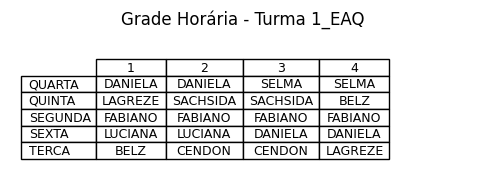

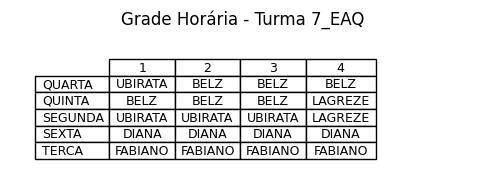

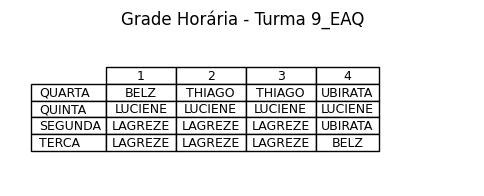

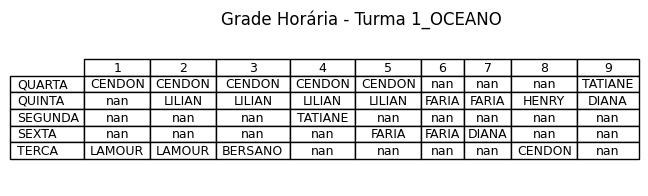

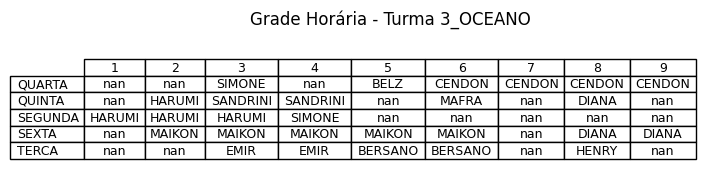

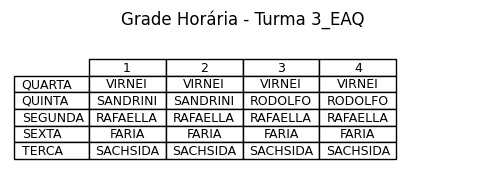

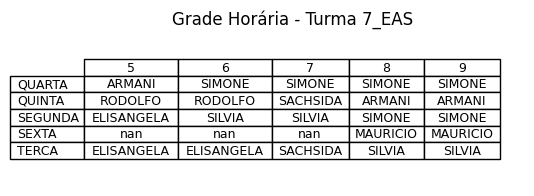

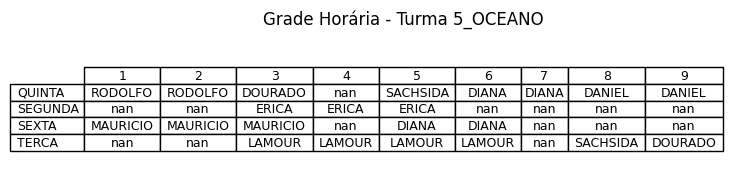

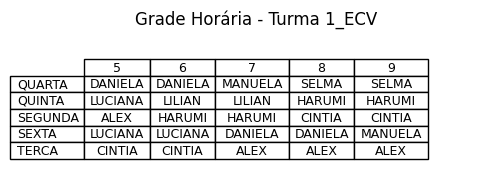

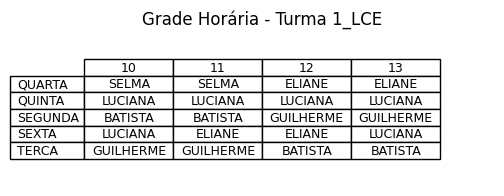

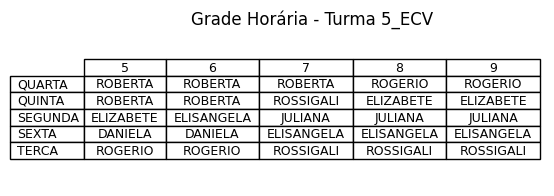

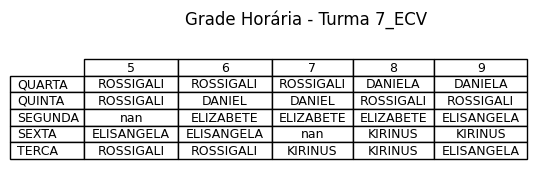

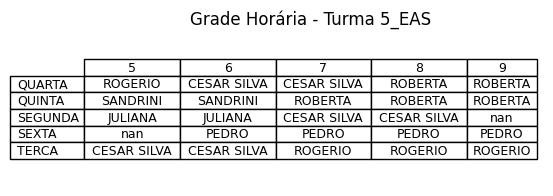

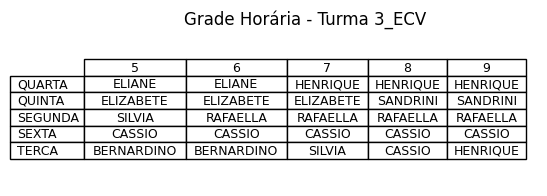

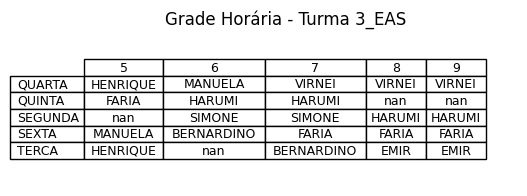

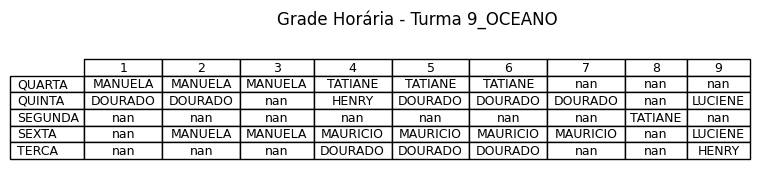

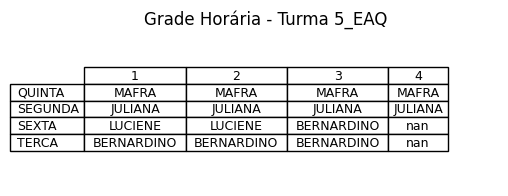

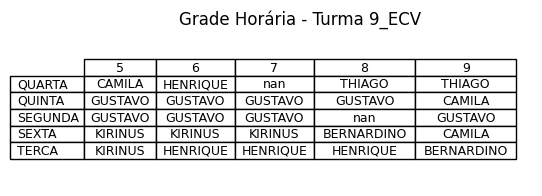

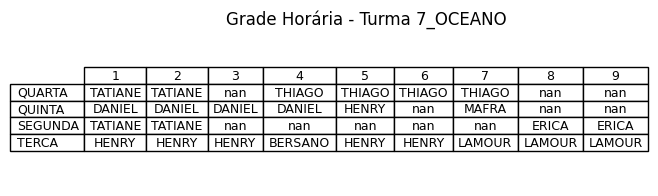

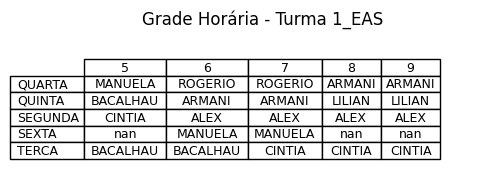

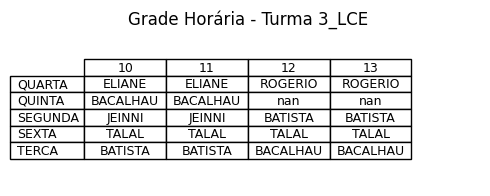

ValueError: Index contains duplicate entries, cannot reshape

In [27]:
# Chamar a função para plotar a grade horária
plotar_grade_horaria(df_resultado)


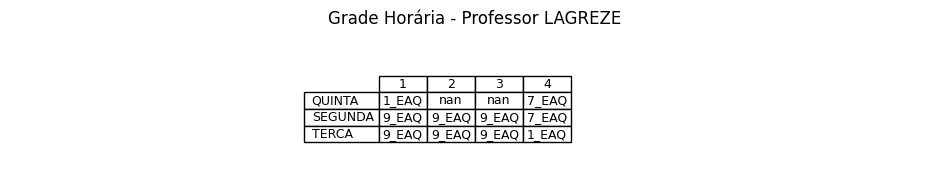

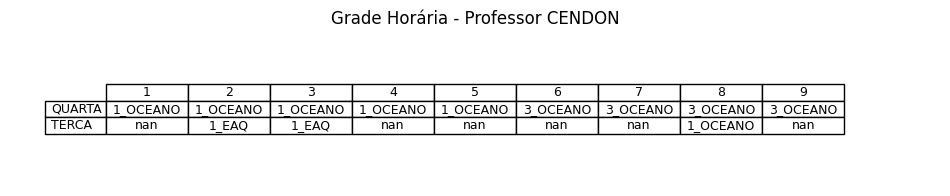

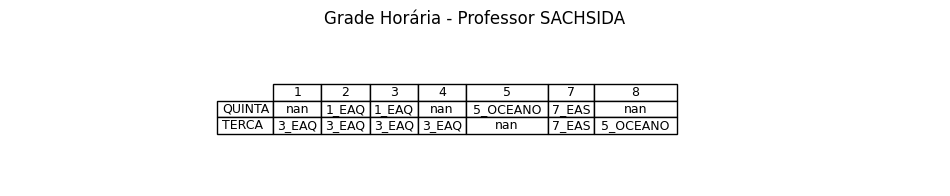

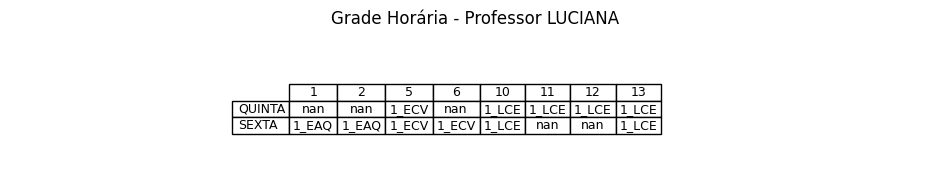

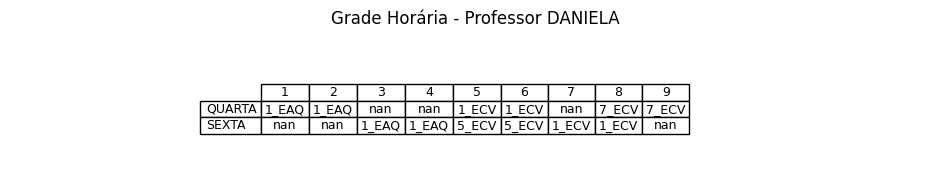

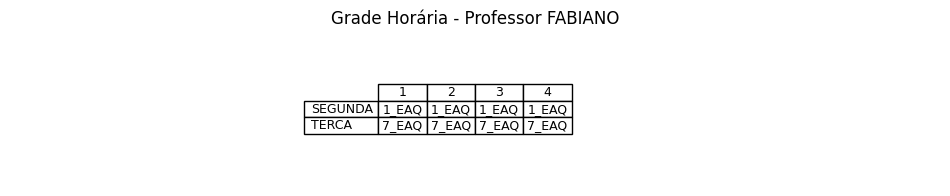

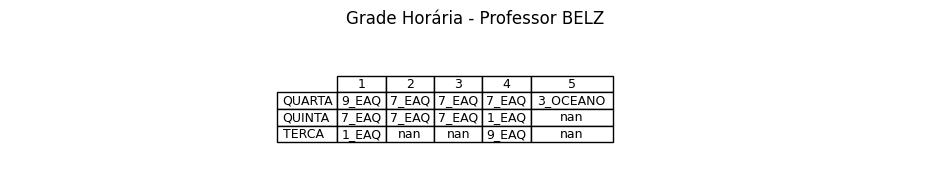

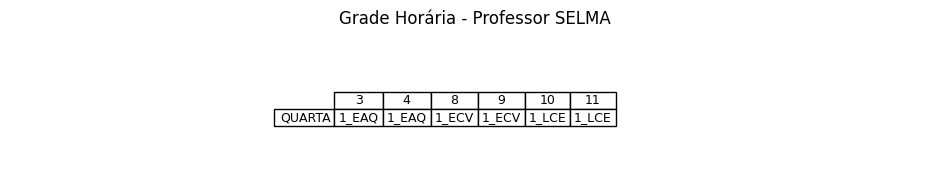

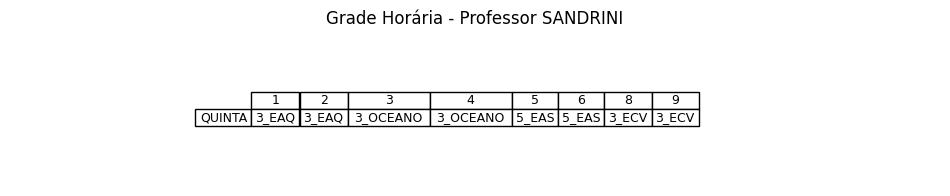

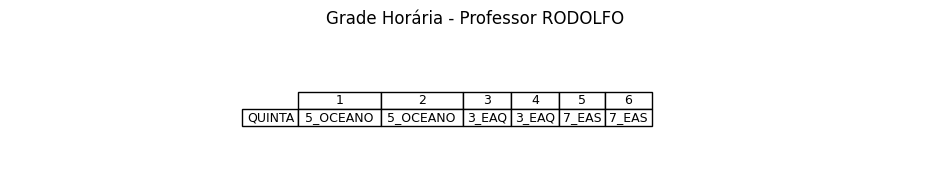

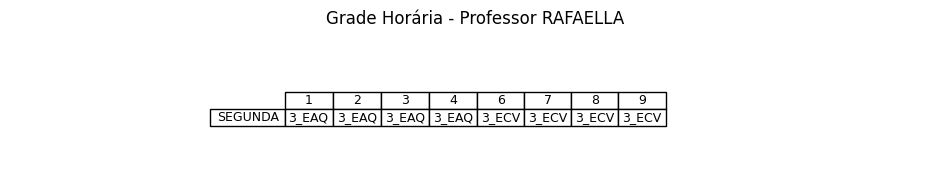

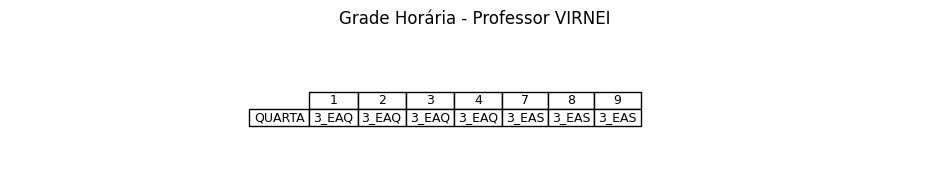

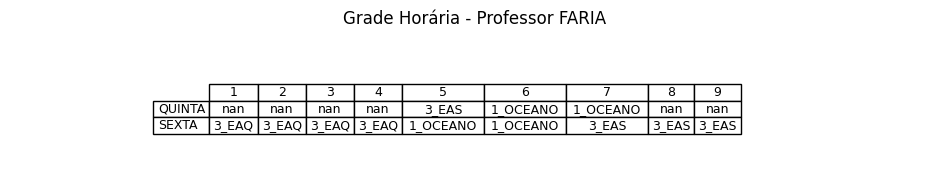

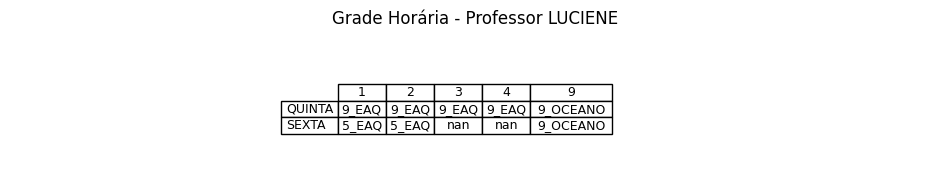

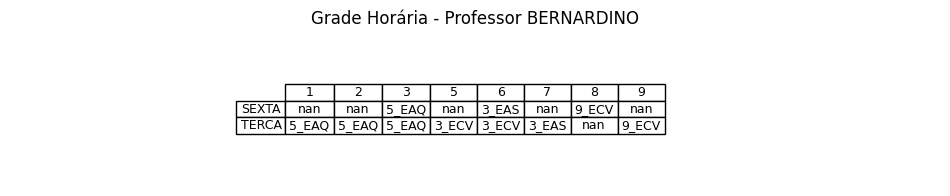

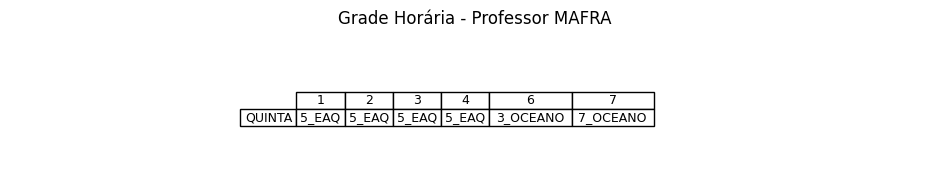

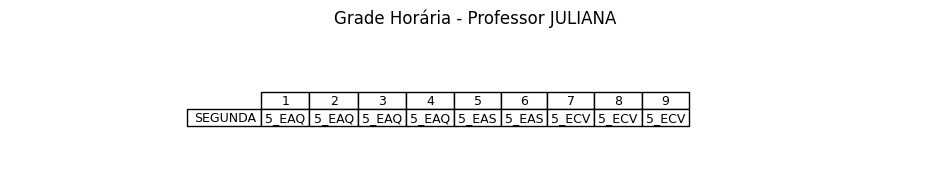

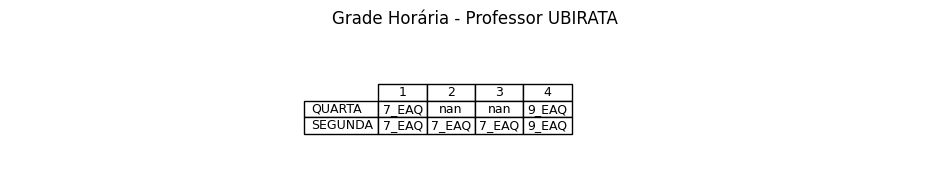

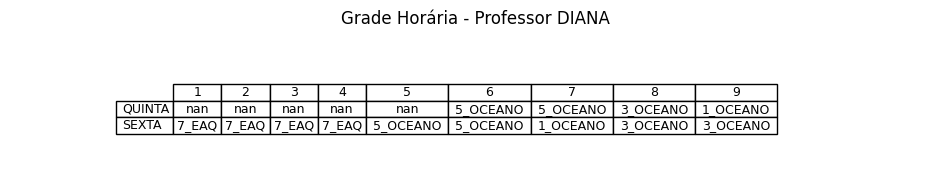

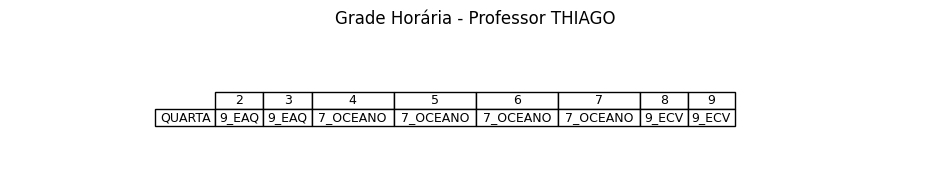

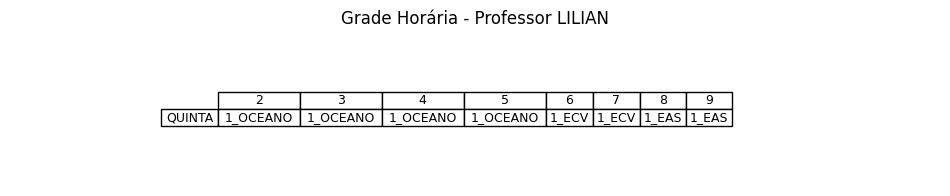

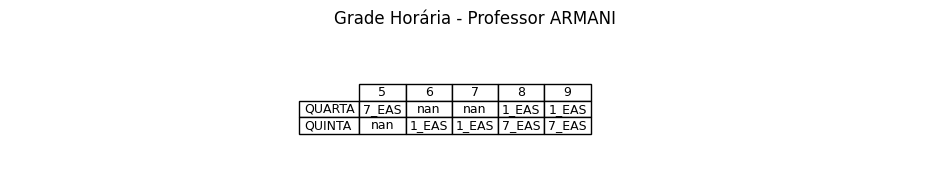

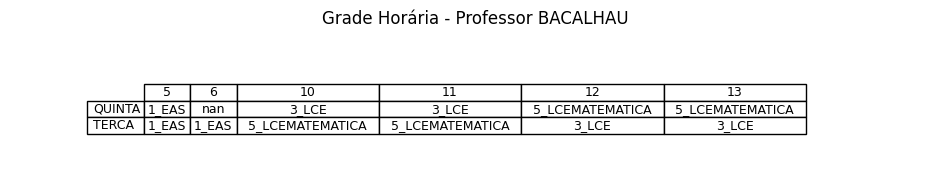

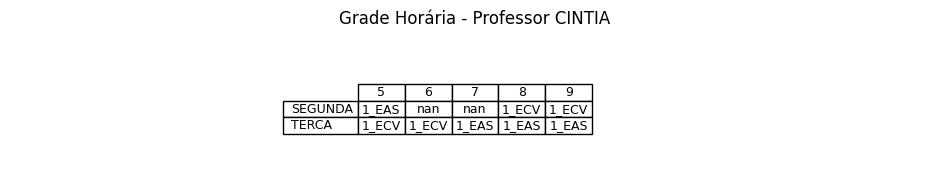

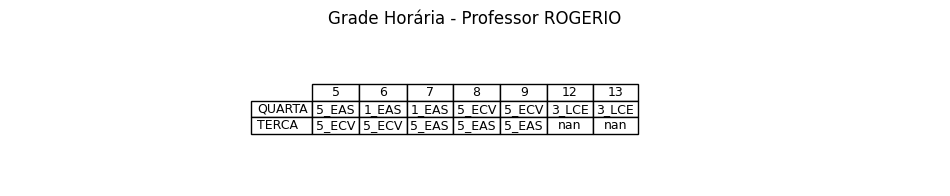

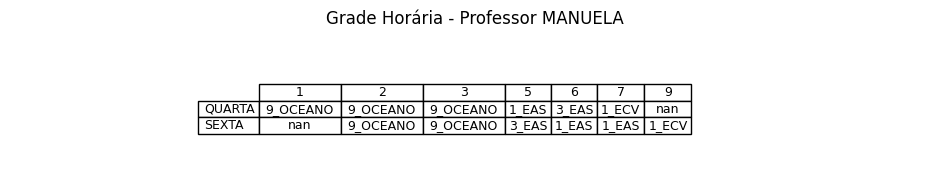

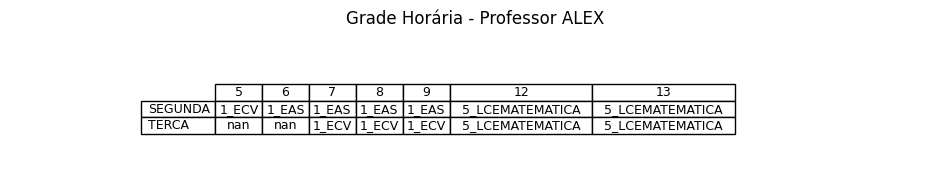

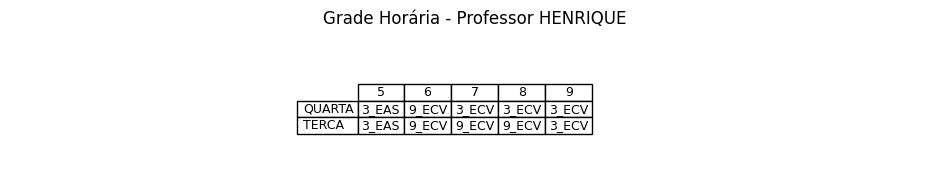

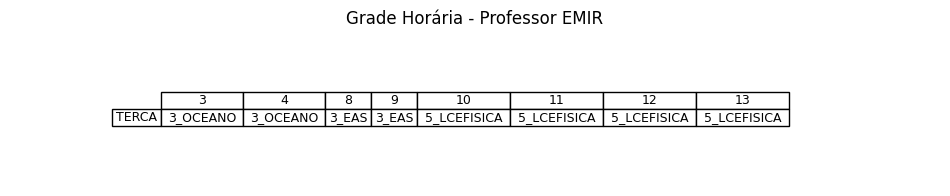

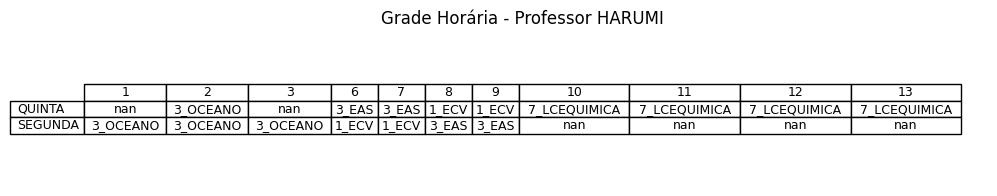

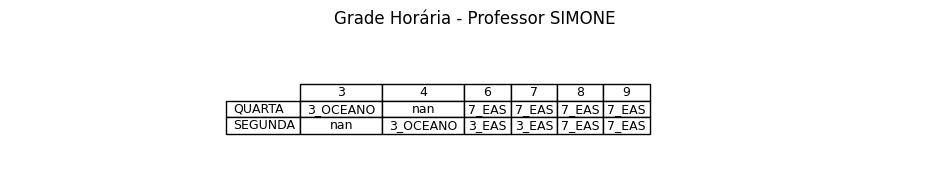

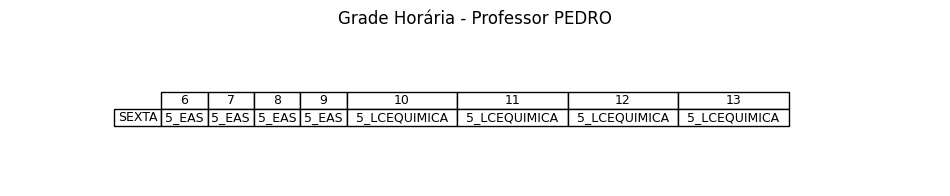

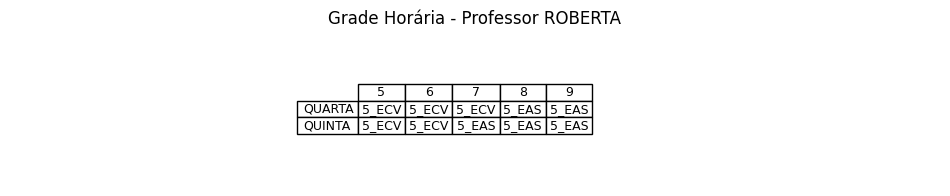

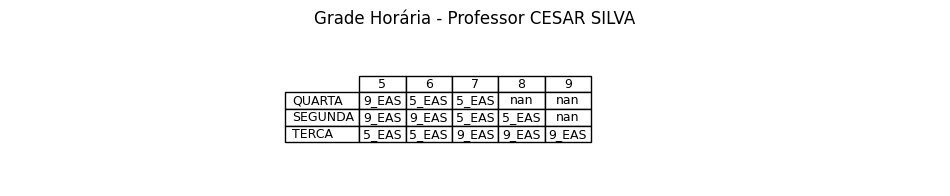

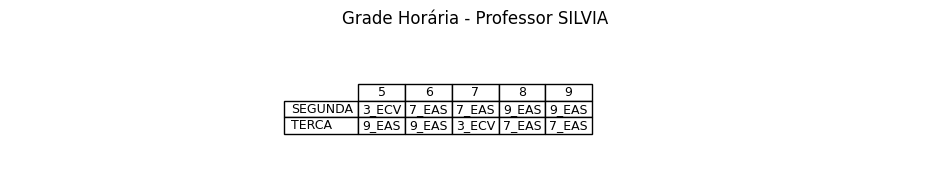

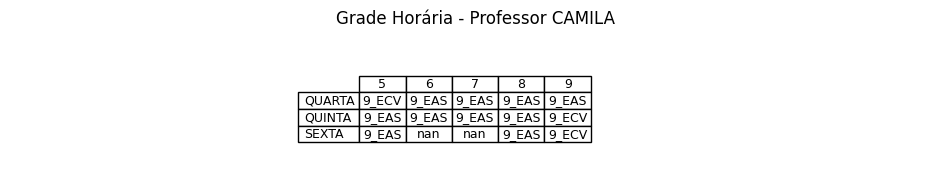

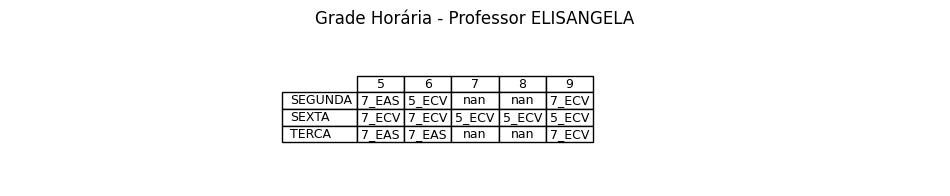

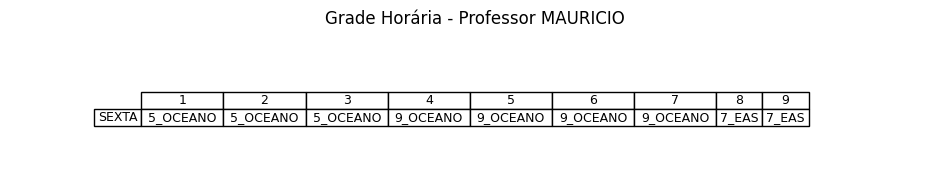

ValueError: Index contains duplicate entries, cannot reshape

In [28]:
# Chamar a função para plotar a grade horária
plotar_grade_horaria_por_professor(df_resultado)
